In [2]:
%autosave 300

Autosaving every 300 seconds


# definition of word embedding

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

##  links

__tutorial:__

- [tensorflow word embedding](https://www.tensorflow.org/text/guide/word_embeddings)
- [analyticsvidhya](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [interactive word2vec](https://jalammar.github.io/illustrated-word2vec/)
- [搞懂 NLP 中的词向量，看这一篇就足够](https://www.infoq.cn/article/pfvzxggdm27453bbs24w)
- [词向量模型之CBOW模型的原理与实现](https://aistudio.baidu.com/aistudio/projectdetail/306925)

__embedding library:__

- [gensim word2vec](https://radimrehurek.com/gensim/models/word2vec.html)
- [fasttext word2vec](https://fasttext.cc/docs/en/unsupervised-tutorial.html)
- [standford glove embedding](https://nlp.stanford.edu/projects/glove/)

# word representation

__Representing text as numbers:__


Consider the sentence ###"The cat sat on the mat".###

[this,cat,sat,on,the,meal]




__approach1: one hot vector__



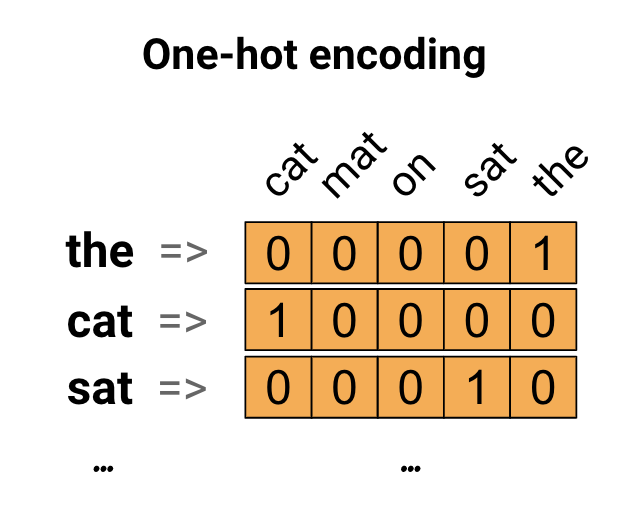








__approach2: encode each word using a unique number__



Continuing the example above, you could assign 1 to "cat", 2 to "mat", and so on. You could then encode the sentence "The cat sat on the mat" as a dense vector like [5, 1, 4, 3, 5, 2]. This approach is efficient. Instead of a sparse vector, you now have a dense one (where all elements are full).

__the drawbacks of not using word embedding:__
- sparase matrix(approach 1)
- it does not capture any relationship between words(approach 2)
- no relationship between the similarity of any two words and the similarity(apprach 2)


## featureized reprentation of word

__A word embedding is a learned representation for text where words that have the same meaning have a similar representation.__


Word embeddings give us a way to use an efficient, dense representation in which similar words have a similar encoding. 

Importantly, you do not have to specify this encoding by hand. 

An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify). Instead of specifying the values for the embedding manually, they are trainable parameters (weights learned by the model during training, in the same way a model learns weights for a dense layer). 

__word representation vs word embedding__

__word representation:__

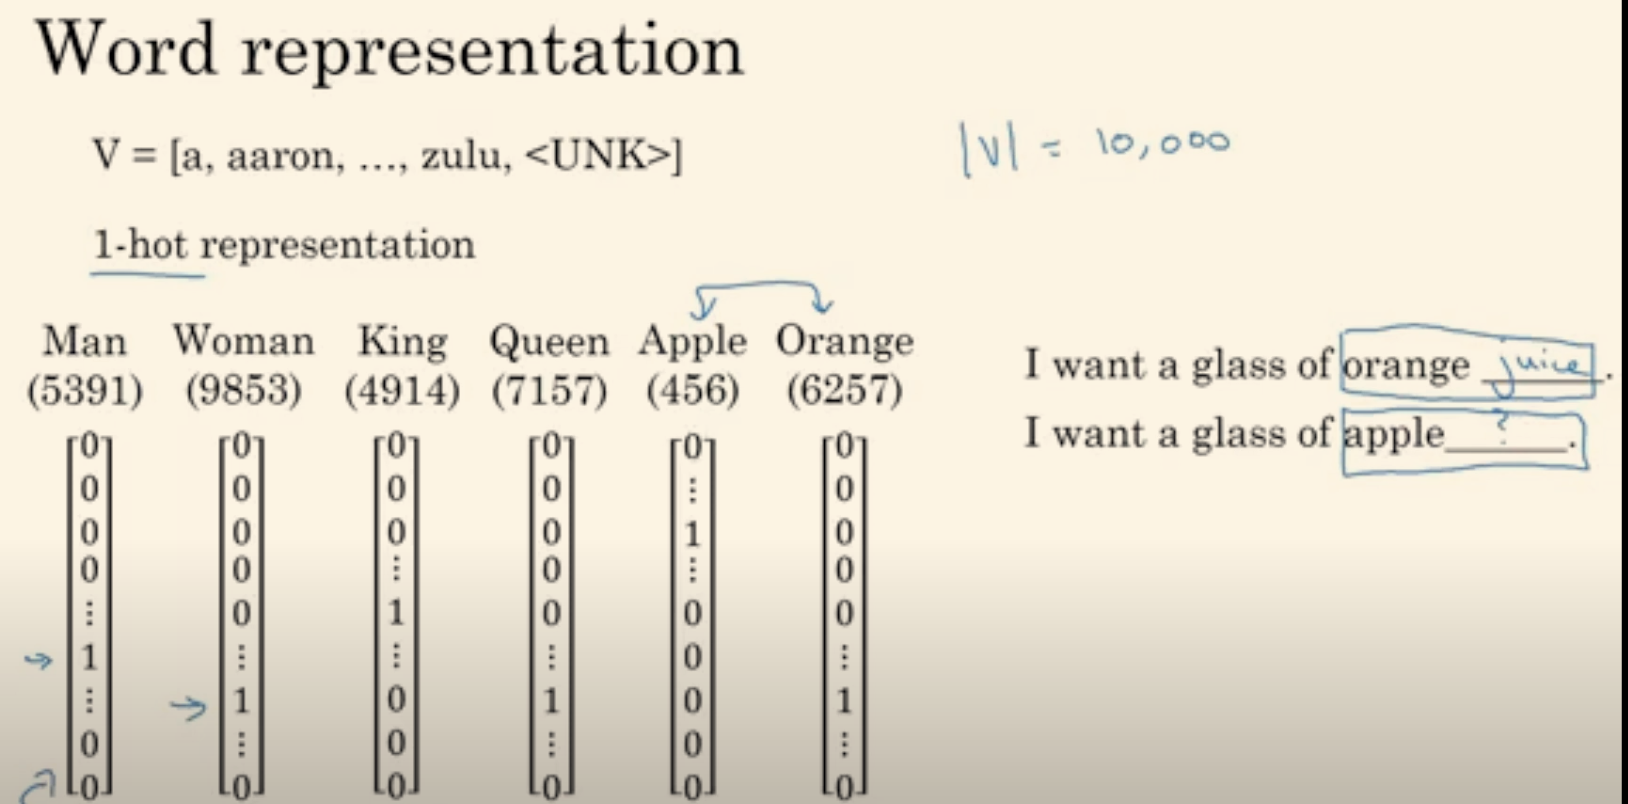

__word embedding:__
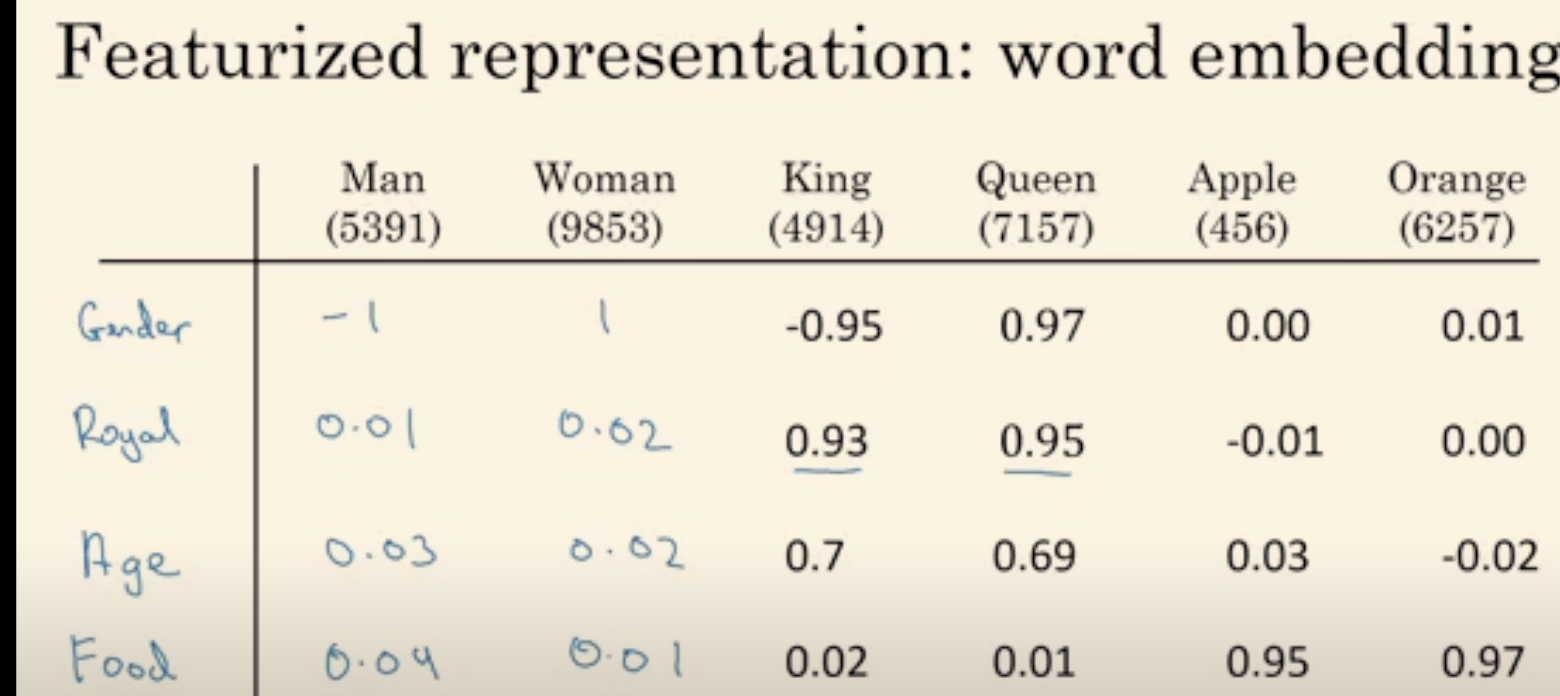

## Properties of Word Embeddings

how to know word king is similar to queen?

In [6]:
# assume 4 dimensional word embedding
import numpy as np

e_king = np.array([-0.95,0.93,0.7,0.02])
e_queen = np.array([0.96,0.95,0.69,0.01])
abs(e_king - e_queen).T


array([1.91, 0.02, 0.01, 0.01])

e_king - e_queen ~ e_king - ?

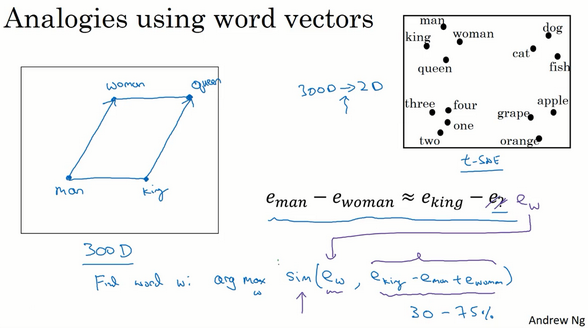

__using cosine similarity__

- sim(u,v): similarity of two vectors u and v, by measuring the cosine angle between u and v.
- the smaller the angle, the similar the vectors

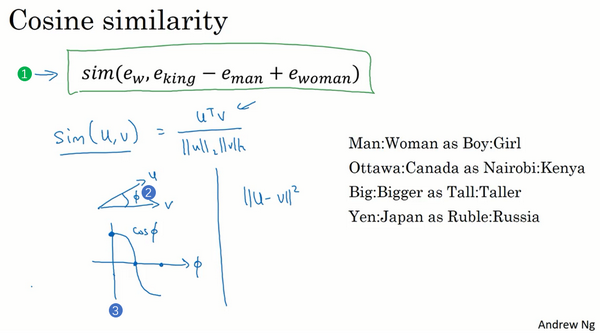

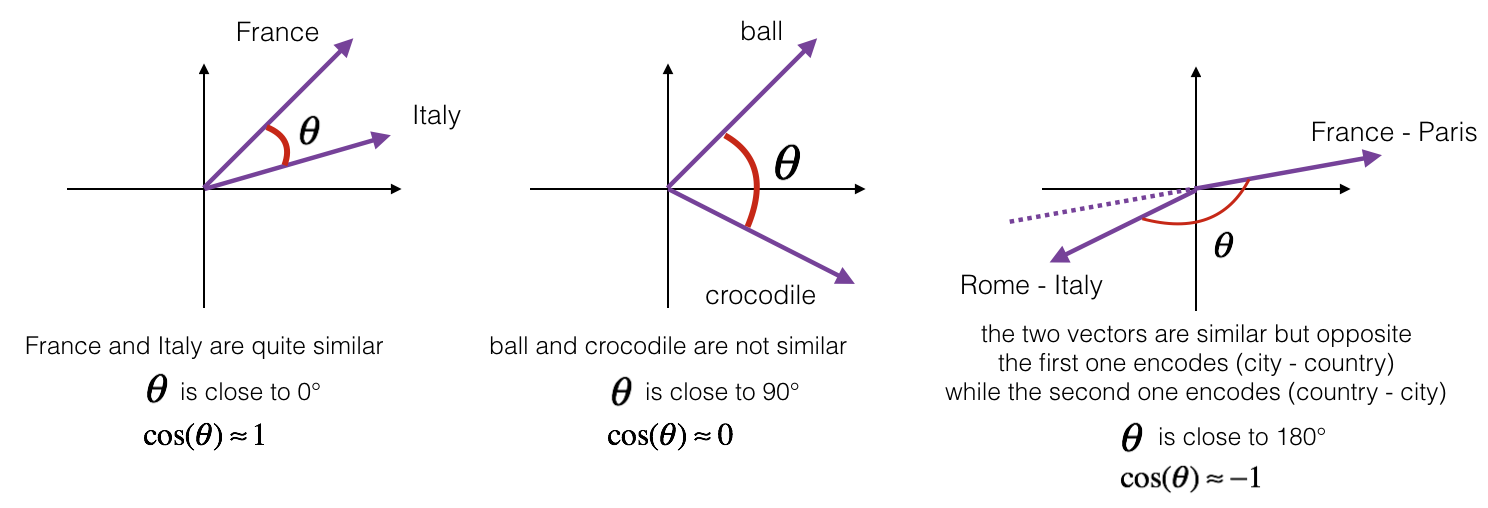

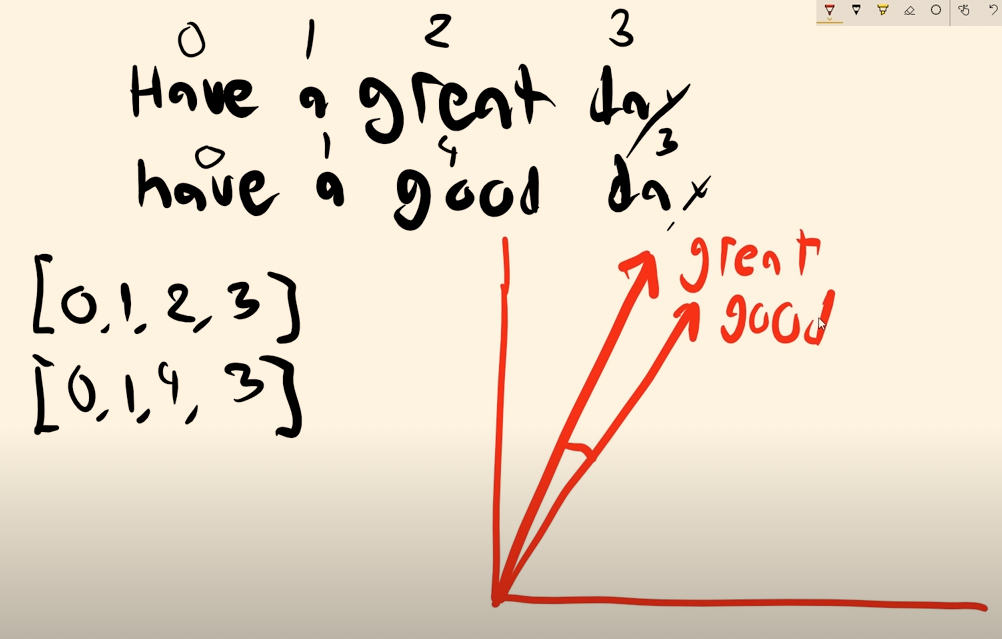

## embedding matrix

embedding matrix is learning algorithm trying to learn.(instead of one hot encoding)


<h3 align="center">embedding matrix at high level</h3> 

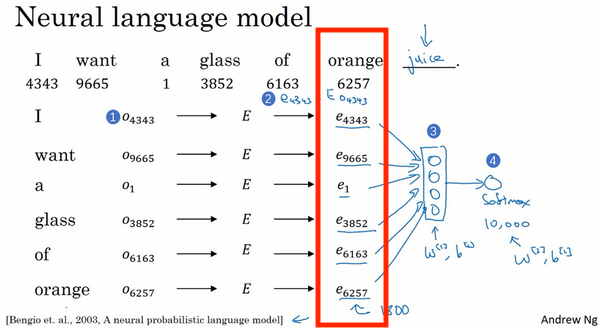

<h4 align="center">embedding matrix structure</h4> 





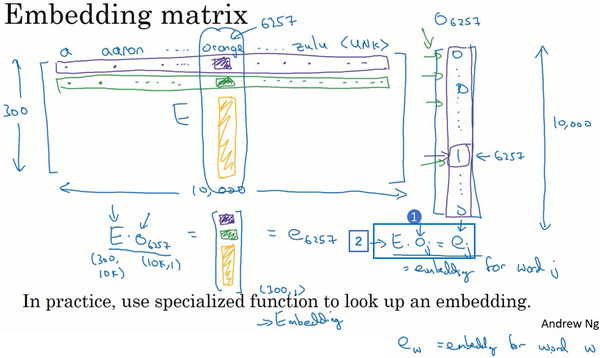

in this example, it 300 * 10000 array(E), 300 is feature, 10000 is word.

for each word, 'organge',the embedding matrix is __e_orange__:
- E_orange * onehot_orange = e_orange
- (300 * 10000) * (10000*1) = 300*1

in general, the embedding matrix for each word is:
- __E * O_j = e_j__

## embedding layer

in practice, we use the special function to map the matrix vector multiplication for each embedding word.
called embedding layer.

__An embedding layer would allow you to insert these 300-dimension vectors in the place of word-indexes automatically.you can think of an embedding layer as dimension expansion__

in __kearas__,The Embedding layer can be understood as a lookup table that maps from integer indices (which stand for specific words) to dense vectors (their embeddings). The dimensionality (or width) of the embedding is a parameter you can experiment with to see what works well for your problem, much in the same way you would experiment with the number of neurons in a Dense layer.

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [41]:
model = Sequential()
model.add(Embedding(3, 2, input_length=7))
model.compile('rmsprop', 'mse')

input_array = np.random.randint(2, size=(4, 2)) # 4*2 array


In [42]:
output_array = model.predict(input_array)
output_array # 4*2*2

array([[[-0.04953576, -0.00862368],
        [ 0.0170717 , -0.02377881]],

       [[-0.04953576, -0.00862368],
        [-0.04953576, -0.00862368]],

       [[-0.04953576, -0.00862368],
        [ 0.0170717 , -0.02377881]],

       [[ 0.0170717 , -0.02377881],
        [ 0.0170717 , -0.02377881]]], dtype=float32)

In [43]:
#It’s a simple map from the given range to a 2d space:
model.get_weights()


[array([[-0.04953576, -0.00862368],
        [ 0.0170717 , -0.02377881],
        [-0.04156851,  0.04171043]], dtype=float32)]

# learning word embbeding 

Word2Vec is not a singular algorithm, rather, it is a family of model architectures and optimizations that can be used __to learn word embeddings__ from large datasets.Word2vec is a group of related models that data scientists use to produce word embeddings, which are numeric representations for words.


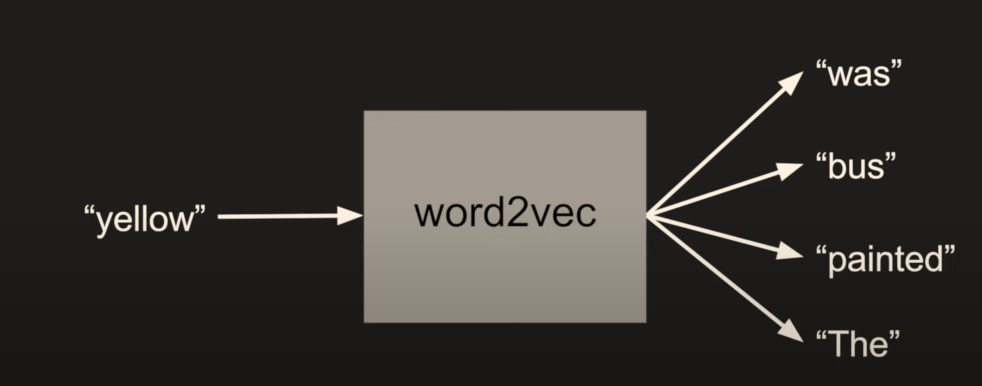


__why word2vec?:__
- preserve relationship between words
- similar context should have simlar embeddings

## type of word2vec model

__Frequency/Probablity based Embedding:(TRADIONAL ML METHOD)__
- Count Vectors
- TF-IDF
- Co-Occurrence Matrix 
- Bag of Words(cBOW)


__Prediction based - Static:__
- Word2vec(cbow and skipgram)
- GloVe(Co-Occurrence Matrix based)


__Prediction based - Non-Static:__

Non static: address 一次多意的问题. Apple(company & fruit)
- ELMO
- BERT
- GPT


## word embedding library



__1.word2vec-gensim__

The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling:

- __skipgram model__ learns to predict a target word thanks to a nearby word. 

- __cbow model__ predicts the target word according to its context. 



__2.word2vec-glove:__

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

## advantage and disadvantage

__Advantage of ngram:__

- does not need to have huge RAM requirements like that of co-occurrence matrix

__Disadvantage of ngram:__

- CBOW takes the average of the context of a word


__Advantge of skipgram:__

- Skip-gram model can capture two semantics for a single word. i.e it will have two vector representations of Apple. One for the company and other for the fruit.
- Skip-gram with negative sub-sampling outperforms every other method generally.

## simple word embedding algorithm

__i want a glass of organge__ __

- giving context i want a glass of
- want the model to learn word embedding and predict the next word

for this example __[i want a glass of orange]__

if we feed 6 words into neural network, the embedding layer shape is (6 word * 300 d) = (1800,1)

if we only take last 4 word, __[want a glass of]__, the embedding layer dimension is (4 * 300) = (1200,1)

<h4 align="center">simple word embedding algorithm</h4> 


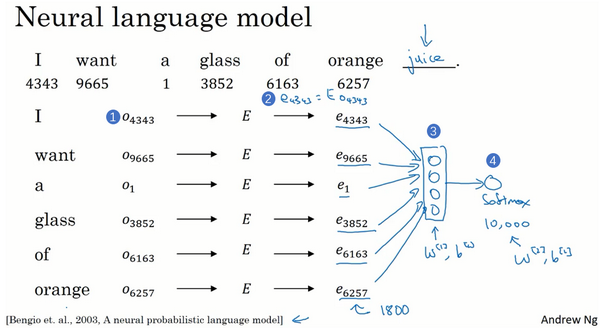

but really, our goal is not to learn launguage model itself and predict the next word...

## context-based embedding algorithm

Context-based: supervised approach. Given a local context, we want to design a model to predict the target words and model learns the efficient word embedding representation.

compare with 3.4 simple approach, 
- the predict problem from __[i want a glass of organge __]__ 
- to __[a glass of organge __ to go along with]__ 



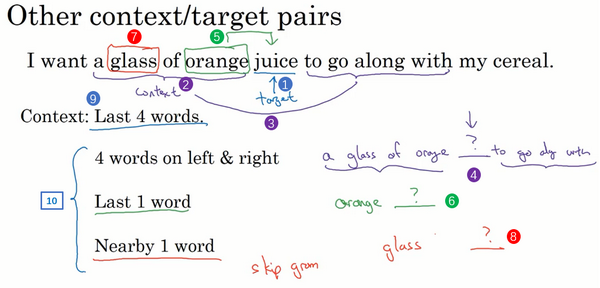

Each context-target pair is treated as a new observation in the data.

(“swing”, “sentence”), (“swing”, “should”), (“swing”, “the”), and (“swing”, “sword”).

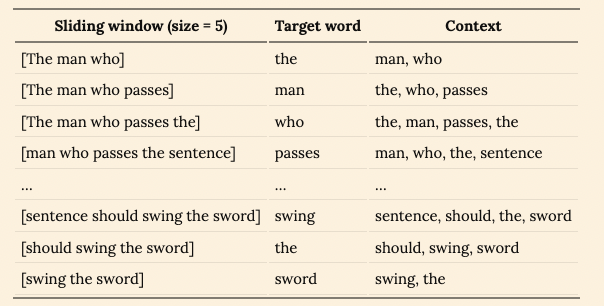

## cbow algorithm(word2vec/context based)

continous bag of words(cbow) __learning word embedding__ by predict the __target__ word from the __context__

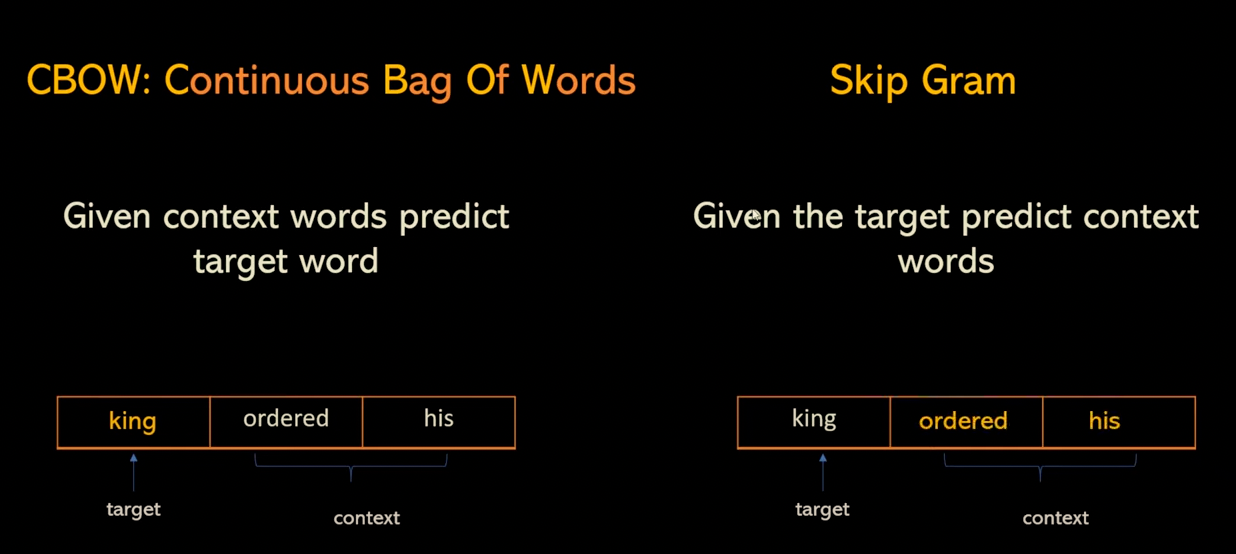

<h4 align="center">cbow arciture</h4> 


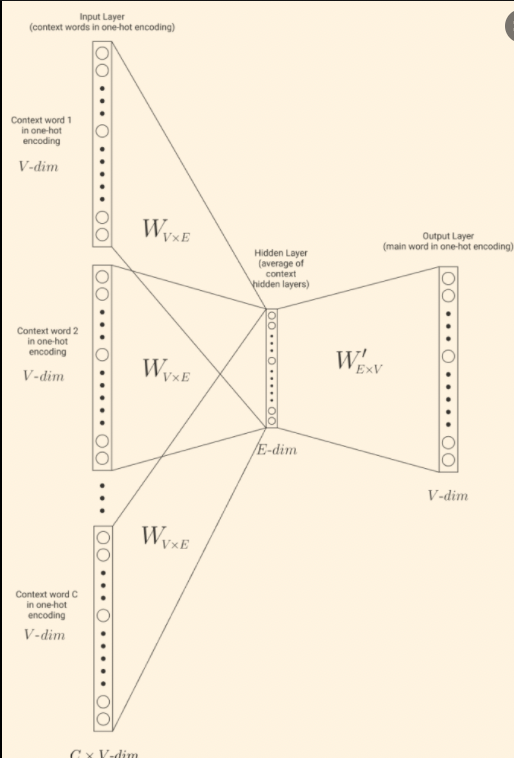

## skip-gram algorithm(word2vec/context based)

skipgram __learning word embedding__ by predict the __context__ word from the __target__

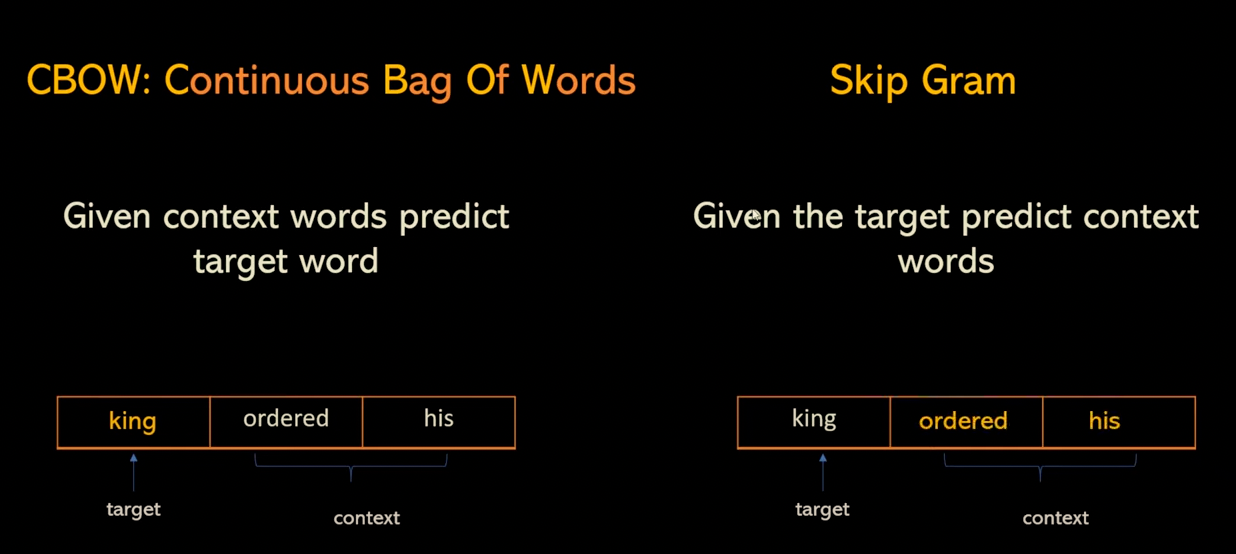

<h4 align="center">problem formulation</h4> 



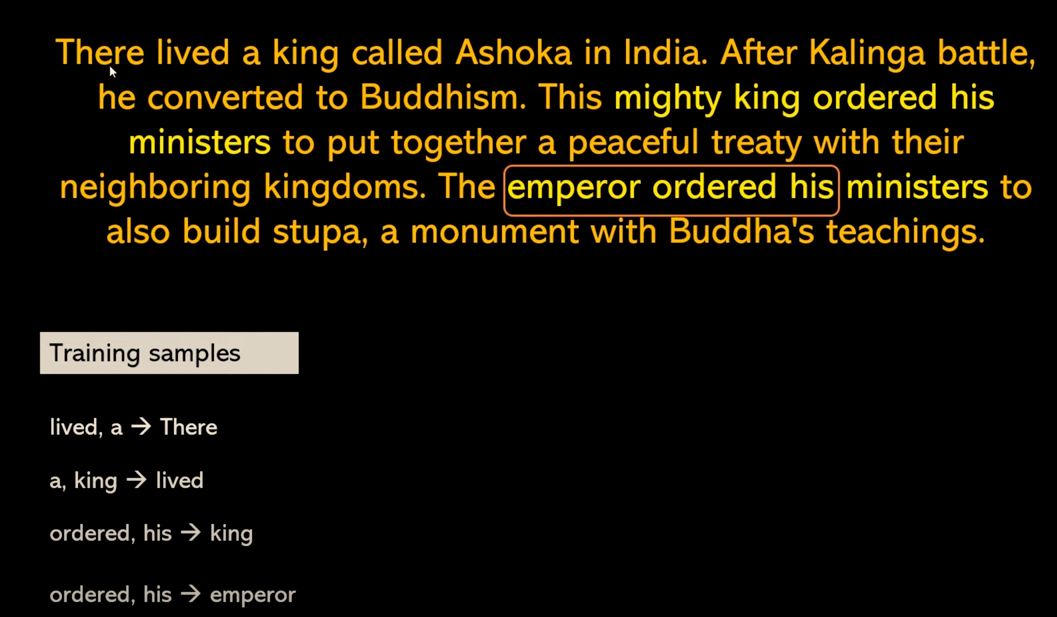

<h4 align="center">learning archtiture</h4> 



[king order his]

the context, target pair is [ordered,king] , [his,king]

__1st layer:__

- y: king, x1: ordered, x2:his

- for word __order__, the one (5000,1) one-hot vector is the top 

- for word __his__, the one (5000,1) one-hot vector is the bottom

- we stack all the word together, lets say (10000,1) one hot vector

__2nd layer:__

- this is the embedding matrix






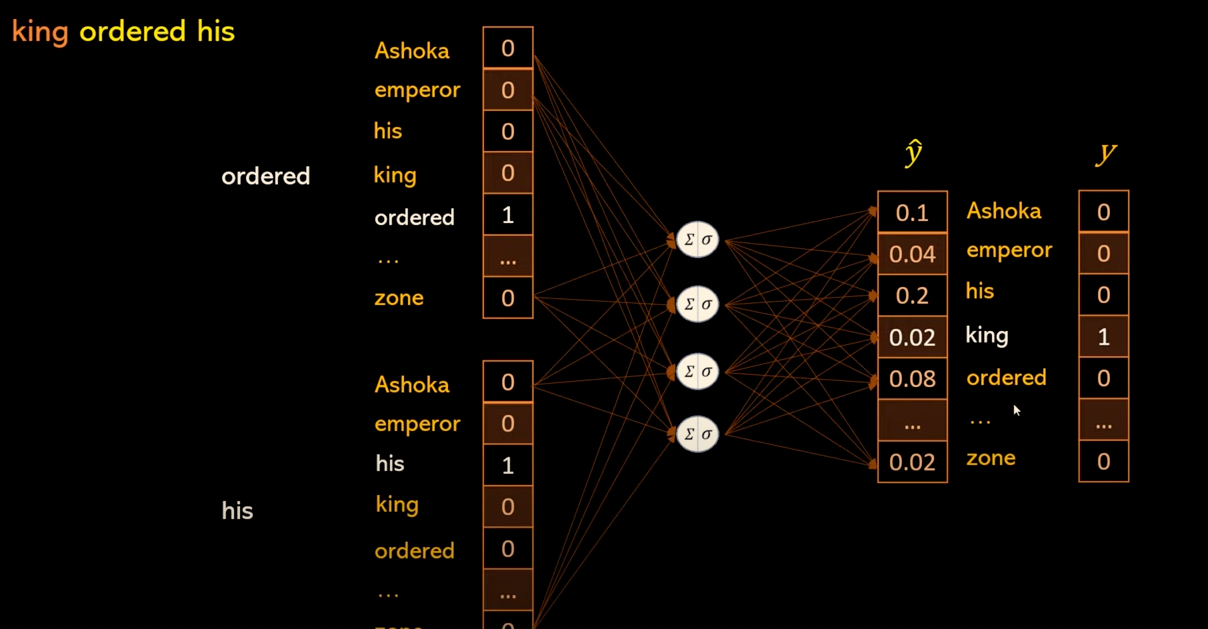

<h4 align="center">skipgram archtiture</h4> 


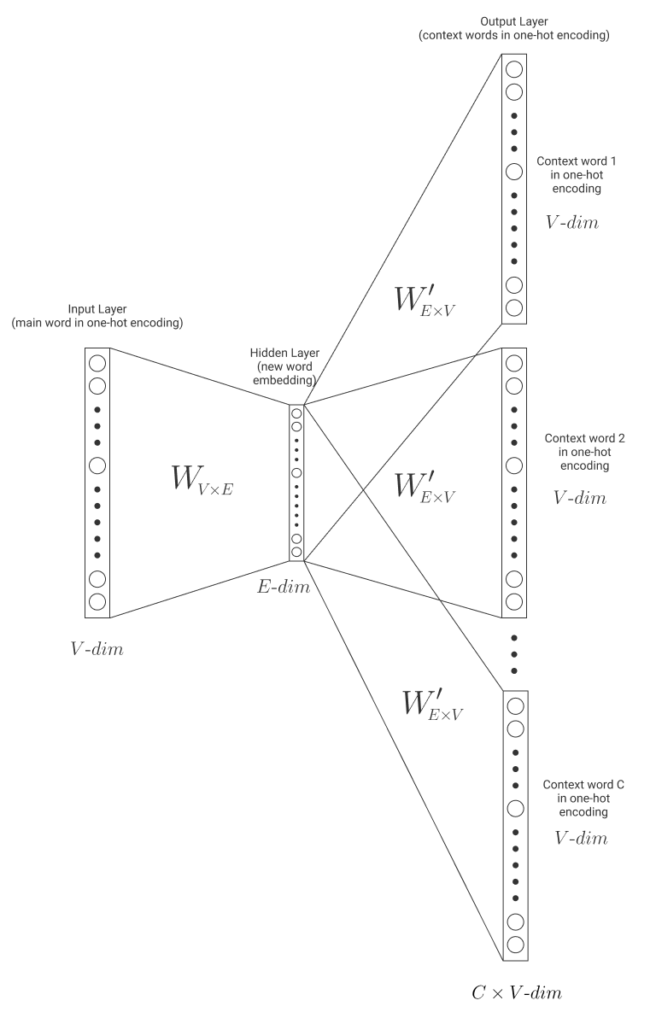

## glove algorithm

the drawback of __skipgram__ is that it only taking account __local context__ of the word





__The Global Vector (GloVe)__ model  aims to combine the count-based matrix factorization and the context-based skip-gram model together. it take into account __global context__ of the word by using __co-occurrences__ can reveal the meanings of words.

# programming

## 'word2vec' embedding

download google news word2vec

In [46]:
from tensorflow.keras.utils import get_file

try:
    path = get_file('GoogleNews-vectors-negative300.bin.gz', 
        origin='https://s3.amazonaws.com/dl4j-distribution/' +\
                    'GoogleNews-vectors-negative300.bin.gz')
except:
    print('Error downloading')
    raise
    
print(path)  

1647050752/1647046227 [==============================] - 272s 0us/step
/home/admin/wallixadm/.keras/datasets/GoogleNews-vectors-negative300.bin.gz


In [47]:
# load google news word2vec using gensim

import gensim

model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

In [48]:
w = model['hello'] # embedding for word hello (300,1)


In [51]:
w.shape

(300,)

In [52]:
w1 = model['king']
w2 = model['queen']

dist = np.linalg.norm(w1-w2)

print(dist)

2.4796925


In [53]:
# This shows the classic word2vec equation of queen = (king - man) + female
model.most_similar(positive=['woman', 'king'], negative=['man'])


[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [54]:
model.similarity('iphone', 'android')


0.5633578

In [60]:
model.similarity('man', 'woman')


0.76640123

In [61]:
model.similarity('king', 'queen')


0.6510956

## embedding layer

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_11_03_embedding.ipynb

- input_dim = How large is the vocabulary? How many categories are you encoding? This parameter is the number of items in your "lookup table."
- output_dim = How many numbers in the vector that you wish to return.
- input_length = How many items are in the input feature vector that you need to transform?


Now we create a neural network with a vocabulary size of 10, which will reduce those values between 0-9 to 4 number vectors. Each feature vector coming in will have two such features. This neural network does nothing more than pass the embedding on to the output. But it does let us see what the embedding is doing.



In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np

model = Sequential()
embedding_layer = Embedding(input_dim=10, output_dim=4, input_length=3)
model.add(embedding_layer)
model.compile('adam', 'mse')

In [71]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 3, 4)              40        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


For this neural network, which is just an embedding layer, 

- the input is a vector of __size 2__. These two inputs are integer numbers from 0 to 9 (corresponding to the requested input_dim quantity of 10 values). 

- Looking at the summary above, we see that the embedding layer has __40 parameters__. This value comes from the embedded lookup table that contains four amounts (output_dim) for each of the 10 (input_dim) possible integer values for the two inputs. 

- The output is 2 (input_length) length 4 (output_dim) vectors, resulting in a total output __size of 8__, which corresponds to the Output Shape given in the summary above.



In [72]:
input_data = np.array([[1,2,4]]) #will get 1,2,4 row of the output matrix 

pred = model.predict(input_data)

print(input_data.shape)
print(pred)


(1, 3)
[[[ 0.03106835 -0.02535412  0.04499619 -0.03050718]
  [-0.0134983  -0.00487429  0.0238328  -0.00988245]
  [-0.00880349 -0.0151306   0.00307053 -0.00063956]]]


Here we see two length-4 vectors that Keras looked up for each of the input integers. Recall that Python arrays are zero-based. Keras replaced the value of 1 with the second row of the 10 x 4 lookup matrix. Similarly, Keras replaced the value of 2 by the third row of the lookup matrix. The following code displays the lookup matrix in its entirety. The embedding layer performs no mathematical operations other than inserting the correct row from the lookup table.

In [73]:
embedding_layer.get_weights()


[array([[-0.01417577,  0.03604576,  0.04293991,  0.0380755 ],
        [ 0.03106835, -0.02535412,  0.04499619, -0.03050718],
        [-0.0134983 , -0.00487429,  0.0238328 , -0.00988245],
        [-0.01376411, -0.04422274, -0.01294508, -0.02188379],
        [-0.00880349, -0.0151306 ,  0.00307053, -0.00063956],
        [ 0.04968763,  0.02318782,  0.00106776,  0.03887923],
        [-0.01548382,  0.01409093, -0.04879469, -0.02315364],
        [ 0.0205104 ,  0.03045281,  0.02136813, -0.02464268],
        [-0.00619452, -0.01183804, -0.03102703, -0.03261935],
        [-0.04572573,  0.01914296, -0.01507638,  0.01217204]],
       dtype=float32)]

The values above are random parameters that Keras generated as starting points. Generally, we will either transfer an embedding or train these random values into something useful. The next section demonstrates how to embed a hand-coded embedding.

## glove with keras

https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/nlp/ipynb/pretrained_word_embeddings.ipynb

In [155]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.utils import get_file
import os
import pathlib
import re
from gensim.models import Word2Vec
# from transformers import BertTokenizer, TFBertModel, BertModel,TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras import initializers
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import SeparableConv1D
from tensorflow.python.keras.layers import GlobalMaxPooling1D,MaxPooling1D,Convolution1D, MaxPool1D, Flatten
from tensorflow.python.keras.layers import GlobalAveragePooling1D
import csv
import itertools

os.chdir('/data/jyu29')

In [65]:
data_dir = 'data'
for fn in os.listdir(data_dir):
    if fn.endswith('.txt'):
        print(fn)

twitt30k.txt
glove.42B.300d.txt
glove.840B.300d.txt


In [97]:
df =  pd.read_csv('data/twitt30k.txt', sep=',', engine='python')
df.head(2)

twitts  sentiment
0       @robbiebronniman Sounds like a great night.           1
1  Damn the person who stolde my wallet !!!!!  Ma...          1

In [98]:
%%time

contractions = {"ain't":"am not",
   "n":"and"            
    }

text = ' '.join(df['twitts'])
text = text.split()
text[:3]

CPU times: user 31.6 ms, sys: 847 µs, total: 32.5 ms
Wall time: 32.3 ms


['@robbiebronniman', 'Sounds', 'like']

In [99]:
## frequency count of word
freq_comm = pd.Series(text).value_counts()
freq_comm

to               10110
I                 9418
the               8996
a                 6913
my                5219
                 ...  
contributions        1
@remirotthaus        1
@cocofresh           1
rollover,            1
SLUT,                1
Length: 69193, dtype: int64

In [100]:
rare = freq_comm[freq_comm.values==1]
len(rare)

52776

In [108]:
def get_clean_text(x):
    if type(x) is str:
        x = x.lower()
        ### replace contraction word with correct one
#         for key in contractions:
#             value = contractions[key]
#             x = x.replace(key,value)
        x = re.sub('[^a-z A-Z]+', '', x)
        x = re.sub('RT+', '', x)
        X = re.sub(r'^https?:\/\/.*[\r\n]*', '', x)
        ### remove word frequency less than 1
        x = ' '.join([t for t in x.split() if t not in rare])
        return x


In [109]:
df['clean_text'] = df['twitts'].apply(lambda x:get_clean_text(x))

In [110]:
df.head(2)

twitts  sentiment  \
0       @robbiebronniman Sounds like a great night.           1   
1  Damn the person who stolde my wallet !!!!!  Ma...          1   

                                          clean_text  
0          robbiebronniman sounds like a great night  
1  damn the person who my wallet may karma come b...

In [111]:
text = df['clean_text'].to_list()
text[:3]

['robbiebronniman sounds like a great night',
 'damn the person who my wallet may karma come back and bite you in the ass',
 'greetings from the piano photo httptwitpiccomoei']

In [135]:
y = df['sentiment']
token = Tokenizer()
token.fit_on_texts(text)

In [136]:
vocab_size = len(token.word_index)
vocab_size #. your training example

33772

In [137]:
# print(token.index_word):
# a dictionary of single word with index

encoded_text = token.texts_to_sequences(text)

In [138]:
## padding zero to econded text with maxium size of 200
max_length = 200
X = pad_sequences(encoded_text,maxlen = max_length,padding='post')

In [139]:
%%time

## working with glove vectors, output a dictionary

glove_vector = dict()
file = open('data/glove.840B.300d.txt',encoding='utf-8')

for line in file:
    value = line.split()
    word = value[0]
    vectors = np.asarray(value[1:])
    glove_vector[word] = vectors
file.close()
#     print(value)

KeyboardInterrupt: 

In [127]:
print('Found %s word vectors.' % len(glove_vector))


Found 2195885 word vectors.


In [129]:
# glove_vector.get('you')

In [140]:
## glove vector for twitter data
hits = 0
misses = 0
word_vector_matrix  = np.zeros((vocab_size,300))

for word,index in token.word_index.items():
    vector = glove_vector.get(word) # get vector word from glove
    if vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        word_vector_matrix[index] = vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 7100 words (26672 misses)


In [143]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.2, stratify=y)

In [151]:
print('size of the xtrain size is:%s' %(x_train.shape[0]))
print('size of the xtest size is:%s' %(x_test.shape[0]))

size of the xtrain size is:24000
size of the xtest size is:6000


In [183]:
## basic model 

vec_size = 300
model = keras.Sequential()
model.add(Embedding(vocab_size+1,vec_size,input_length=max_length))
model.add(Convolution1D(64, 8, activation="relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(32,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 200, 300)          10131900  
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 193, 64)           153664    
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 96, 64)            0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 96, 64)            0         
_________________________________________________________________
dense_33 (Dense)             (None, 96, 32)            2080      
_________________________________________________________________
dropout_25 (Dropout)         (None, 96, 32)            0         
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 32)              

In [184]:
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3),loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=6,validation_data = (x_test,y_test))

Epoch 1/6
750/750 [==============================] - 92s 122ms/step - loss: 0.6292 - accuracy: 0.6200 - val_loss: 0.5183 - val_accuracy: 0.7560
Epoch 2/6
750/750 [==============================] - 89s 118ms/step - loss: 0.3978 - accuracy: 0.8315 - val_loss: 0.5082 - val_accuracy: 0.7538
Epoch 3/6
750/750 [==============================] - 92s 123ms/step - loss: 0.2223 - accuracy: 0.9160 - val_loss: 0.5618 - val_accuracy: 0.7308
Epoch 4/6
750/750 [==============================] - 91s 121ms/step - loss: 0.1091 - accuracy: 0.9619 - val_loss: 0.6786 - val_accuracy: 0.7250
Epoch 5/6
750/750 [==============================] - 89s 119ms/step - loss: 0.0668 - accuracy: 0.9760 - val_loss: 0.8375 - val_accuracy: 0.7205
Epoch 6/6
750/750 [==============================] - 87s 116ms/step - loss: 0.0462 - accuracy: 0.9819 - val_loss: 0.9143 - val_accuracy: 0.7125


In [203]:
word_vector_matrix.flatten().shape

(10131600,)

In [200]:
33773*30

1013190